# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[48, 22,  4, ..., 25, 26, 13],
       [43, 71, 19, ..., 47,  6, 49],
       [66, 86, 91, ..., 62, 82, 45],
       ...,
       [26, 40, 41, ..., 53, 86, 73],
       [ 7, 38, 97, ..., 68, 46, 64],
       [38, 69, 48, ..., 88, 89,  6]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
B = np.transpose(np.random.permutation(np.transpose(A)))
B

array([[52, 64, 48, ..., 44, 70, 86],
       [23, 95, 43, ..., 17, 10, 19],
       [61, 28, 66, ..., 66, 30, 24],
       ...,
       [32,  9, 26, ..., 78, 86, 39],
       [82, 50,  7, ..., 85, 35, 10],
       [40, 33, 38, ..., 34, 35, 10]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
C = A[A[:,::2].sum(axis=1) > A[:,1::2].sum(axis=1).mean()]
C

array([[ 5, 57, 83, ..., 83, 93, 17],
       [72, 38, 86, ..., 20,  3, 86],
       [10,  3, 33, ...,  8, 67, 54],
       ...,
       [74, 46, 33, ..., 87, 56, 54],
       [11, 29, 93, ..., 15, 87,  6],
       [ 7, 38, 97, ..., 68, 46, 64]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
i = np.argmax(np.max(A, axis=1) - np.min(A, axis=1))
i

4

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
D = np.argsort(A.reshape(1, len(A)*len(A[0]))).reshape(len(A),len(A[0])) + 1
D

array([[9806, 7655, 6238, ..., 3716, 8422, 6093],
       [3945, 6129, 4460, ..., 3263, 9428, 3291],
       [2508, 2534, 1297, ..., 6666, 2620, 9226],
       ...,
       [2138,  929, 8449, ..., 7566, 2359,  339],
       [4865, 4870, 2590, ..., 7887, 6629,  426],
       [ 777,  421, 5439, ..., 1606, 1630, 7707]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массив, в каждой строке которого максимальный элемент равен $1$, минимальный - $0$. 

In [6]:
A_min = np.tile(A.min(axis=1).reshape((-1, 1)), (1, A.shape[1]))
A_max = np.tile(A.max(axis=1).reshape((-1, 1)), (1, A.shape[1]))
E = (A - A_min) / (A_max - A_min)
E

array([[0.4787234 , 0.20212766, 0.0106383 , ..., 0.23404255, 0.24468085,
        0.10638298],
       [0.42268041, 0.71134021, 0.17525773, ..., 0.46391753, 0.04123711,
        0.48453608],
       [0.69148936, 0.90425532, 0.95744681, ..., 0.64893617, 0.86170213,
        0.46808511],
       ...,
       [0.2688172 , 0.41935484, 0.43010753, ..., 0.55913978, 0.91397849,
        0.77419355],
       [0.07216495, 0.39175258, 1.        , ..., 0.70103093, 0.4742268 ,
        0.65979381],
       [0.38541667, 0.70833333, 0.48958333, ..., 0.90625   , 0.91666667,
        0.05208333]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
c = np.arange(1, 11).reshape((-1, 1, 1))   # shape: (10, 1, 1)
A * c   # shape: (200, 50) * (10, 1, 1) = (1, 200, 50) * (10, 1, 1) = (10, 200, 50)

array([[[ 48,  22,   4, ...,  25,  26,  13],
        [ 43,  71,  19, ...,  47,   6,  49],
        [ 66,  86,  91, ...,  62,  82,  45],
        ...,
        [ 26,  40,  41, ...,  53,  86,  73],
        [  7,  38,  97, ...,  68,  46,  64],
        [ 38,  69,  48, ...,  88,  89,   6]],

       [[ 96,  44,   8, ...,  50,  52,  26],
        [ 86, 142,  38, ...,  94,  12,  98],
        [132, 172, 182, ..., 124, 164,  90],
        ...,
        [ 52,  80,  82, ..., 106, 172, 146],
        [ 14,  76, 194, ..., 136,  92, 128],
        [ 76, 138,  96, ..., 176, 178,  12]],

       [[144,  66,  12, ...,  75,  78,  39],
        [129, 213,  57, ..., 141,  18, 147],
        [198, 258, 273, ..., 186, 246, 135],
        ...,
        [ 78, 120, 123, ..., 159, 258, 219],
        [ 21, 114, 291, ..., 204, 138, 192],
        [114, 207, 144, ..., 264, 267,  18]],

       ...,

       [[384, 176,  32, ..., 200, 208, 104],
        [344, 568, 152, ..., 376,  48, 392],
        [528, 688, 728, ..., 496, 656, 360

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
a1 = A[:,1::2]
a1
a2 = A[:,0::2]
F = np.concatenate((a2, a1), axis=1)
F

array([[48,  4, 42, ..., 97, 25, 13],
       [43, 19, 76, ..., 55, 47, 49],
       [66, 91, 34, ..., 87, 62, 45],
       ...,
       [26, 41, 10, ..., 94, 53, 73],
       [ 7, 97, 40, ..., 22, 68, 64],
       [38, 48, 27, ..., 64, 88,  6]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
len(A[np.all(A > 5, axis=1)])

5

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
np.mean(np.split(A, 10), axis=0)

array([[56.5, 49.1, 38.5, 54.1, 43.3, 50.2, 49. , 47.7, 55.8, 48.9, 56.6,
        51.5, 56. , 61.8, 65.6, 48.2, 60.1, 39.6, 59.6, 42.3, 53.2, 36.8,
        48.6, 54.1, 43.9, 40.2, 36.5, 46.7, 43.9, 43.8, 52.5, 46.5, 46.9,
        62.7, 39.2, 60. , 46. , 50.6, 37.2, 52.1, 58.4, 52.5, 39.3, 67. ,
        47.1, 59.3, 46. , 45.3, 35.3, 50.6],
       [71.4, 47.4, 61.9, 61.7, 35.7, 47.6, 54.8, 62. , 49. , 52.9, 50. ,
        63.4, 56.9, 69.9, 58.1, 48.7, 44.9, 69.1, 60.5, 48.4, 46.3, 40.5,
        49.4, 46.3, 31.2, 59.1, 35.9, 31.7, 58. , 47.5, 52.6, 67.9, 35.2,
        51.8, 45.7, 47.2, 53. , 49.7, 61.9, 60. , 49.3, 55.8, 38.6, 52. ,
        47.5, 46.1, 48. , 51.9, 44.8, 65.6],
       [48.2, 42.3, 53.3, 61.6, 34.9, 48.2, 46.8, 49.2, 43.5, 46.1, 38.5,
        50.9, 53.3, 62.3, 60. , 47.6, 68.8, 56.9, 58.4, 44.7, 42.6, 53.3,
        53. , 47. , 56.7, 58.3, 59.9, 51.3, 48.2, 33.6, 44.2, 45.6, 42.7,
        46.4, 49.3, 41.4, 54.2, 61.4, 57.9, 57.4, 47.1, 47.6, 48.8, 30.3,
        30. , 61. , 51

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
_, ind = np.unique(A, return_index=True)
J = A.reshape((1, len(A) * len(A[0])))
J[0][np.sort(ind)]  

array([48, 22,  4, 62, 42, 15, 72, 59, 64, 35, 74, 43, 84, 70, 30, 71, 54,
       58, 41, 46, 75, 20, 60, 11, 67, 38, 52, 51, 33, 81, 86, 44,  9, 45,
        3, 97, 25, 26, 13, 19, 76, 61, 98, 95,  8,  6, 34, 77, 78, 10, 80,
       50, 85, 32,  2, 68, 73, 83,  7, 87, 29, 23, 99, 24, 17, 31, 55, 47,
       49, 66, 91, 65, 79, 92, 28, 18, 94, 40, 39, 57, 63,  1, 36,  5, 37,
       82, 21, 69, 14,  0, 88, 96, 12, 89, 27, 93, 90, 56, 53, 16])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
np.linalg.norm(A - np.mean(A, axis=0), axis=1)

array([171.20118312, 194.86101483, 192.7616536 , 204.46218501,
       210.85821089, 222.51279761, 175.44436469, 185.74763821,
       220.60053286, 207.48921683, 214.93165216, 205.74084451,
       195.74188387, 202.32586365, 191.31624369, 195.25876446,
       207.63014015, 199.80241515, 216.75314323, 187.85639489,
       186.01571197, 219.27602491, 191.6840502 , 199.89973762,
       175.45949704, 210.41840485, 217.09155926, 186.00270186,
       219.8529852 , 202.27653126, 228.33056103, 208.13131696,
       208.31345396, 216.28260471, 209.87073426, 212.57030625,
       224.80643919, 206.05027323, 210.80003582, 204.54802639,
       204.98210922, 214.66172248, 204.46282083, 185.60825709,
       207.33901008, 220.85451116, 198.65561935, 211.65591204,
       180.46399946, 202.18900836, 193.49921214, 226.8748005 ,
       216.35520585, 214.87153162, 194.31640461, 209.46769465,
       223.84848693, 201.07833076, 216.50654748, 221.32847783,
       190.41624169, 203.02087356, 199.27178701, 207.39

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
np.where(A < 50, 2 * A, 3 * A)

array([[ 96,  44,   8, ...,  50,  52,  26],
       [ 86, 213,  38, ...,  94,  12,  98],
       [198, 258, 273, ..., 186, 246,  90],
       ...,
       [ 52,  80,  82, ..., 159, 258, 219],
       [ 14,  76, 291, ..., 204,  92, 192],
       [ 76, 207,  96, ..., 264, 267,  12]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
def moving_average(arr: np.ndarray, window_size: int) -> np.ndarray:
    return np.convolve(arr[0], np.ones(window_size) / window_size, mode='valid') 
    
V = A.reshape((1, len(A) * len(A[0])))
V3 = moving_average(V, 3)
V5 = moving_average(V, 5)
V10 = moving_average(V, 10)

V5 = np.concatenate((V5,  np.zeros(V3.shape[0] - V5.shape[0])))
V10 = np.concatenate((V10,  np.zeros(V3.shape[0] - V10.shape[0])))
V3 + V5 + V10

array([102.56666667, 103.23333333, 122.        , ..., 129.93333333,
        77.66666667,  61.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


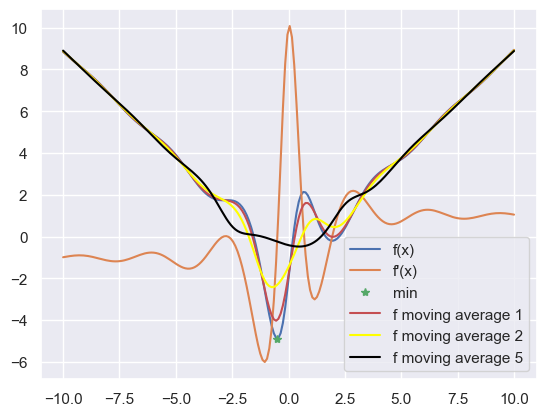

In [15]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.misc import derivative
from typing import Union, Callable


def mov_avg(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray, window: float) -> np.ndarray:
    args = np.linspace(x - window / 2, x + window / 2, window * 100)
    return func(args).mean(axis=0)

def f(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def df(f: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
    return derivative(f, x, dx=1e-6)


x = np.linspace(-10, 10, 200)  # (-10, 10, 1000)
y = f(x) ## (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)
dy = df(f, x)

plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='f\'(x)')

min_f_p = scipy.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = min_f_p[0][0], min_f_p[1]
plt.plot(x_min, y_min, '*', label='min ') 

m_a_1 = mov_avg(f, x, 1)
m_a_2 = mov_avg(f, x, 2)
m_a_5 = mov_avg(f, x, 5)

# print(m_a_1.shape, m_a_2.shape, m_a_5.shape)

plt.plot(x, m_a_1, label='f moving average 1') 
plt.plot(x, m_a_2, label='f moving average 2', color='yellow') 
plt.plot(x, m_a_5, label='f moving average 5', color = 'black')

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1    
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 0, 3]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [17]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    return np.random.choice(np.arange(len(x)), size=c, p=x / np.sum(x))

sample_np(np.array([50, 3, 1, 7, 20]), 5)


array([1, 0, 0, 3, 4])

In [18]:
def sample_np2(x: np.ndarray, c: int) -> np.ndarray:
    assert len(x) > 0
    
    s = np.sum(x)
    val = s * np.random.random(size=c)
    cur = np.cumsum(x)
    idx = np.searchsorted(cur, val)
    return idx

sample_np(np.array([50, 3, 1, 7, 20]), 5)

array([4, 0, 0, 0, 0])

Для проверки гипотезы однородности воспользуемся критерием Стьюдента. 

In [19]:
# realize statistic tests
from scipy import stats

# from scipy.stats import ttest_ind
data1 = sample([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
data2 = sample_np([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
data3 = sample_np2([50, 3, 1, 7, 20, 10, 13, 79, 100, 2], 10000)
stat, p = stats.ttest_ind(data1, data2)
stat2, p2 = stats.ttest_ind(data1, data3)
print(stat, p)
print(stat2, p2)

0.040602456334582135 0.9676132312236914
0.1860865558122246 0.852378772111383


$p-value > 0.05$, мы не попали в критическую область, значит, нет основания отвергнуть нулевую гипотезу при уровне значимости альфа=0.05. 

Для проверки гипотезы однородности воспользуемся Критерием Колмагорова-Смирнова

In [20]:
from scipy.stats import ks_2samp

#perform Kolmagorov-Smirnov test
stat, p = ks_2samp(data1, data2)
stat2, p2 = ks_2samp(data1, data3)
print(stat, p)
print(stat2, p2)

0.0095 0.7576249852868608
0.0053 0.9989767752700422


$p-value > 0.05$, мы не попали в критическую область, значит, нет основания отвергнуть нулевую гипотезу при уровне значимости альфа=0.05. 

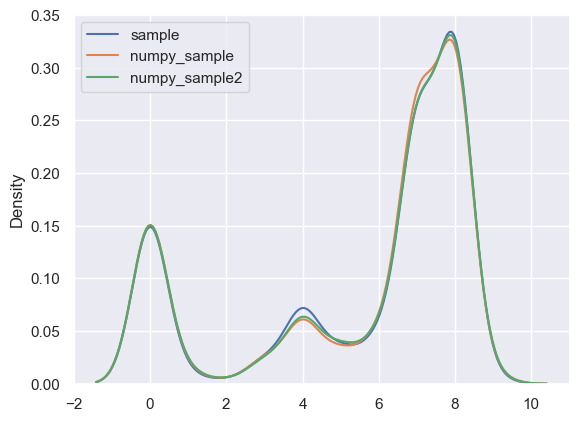

In [21]:
sns.kdeplot(data=data1, label='sample')
sns.kdeplot(data=data2, label='numpy_sample')
sns.kdeplot(data=data3, label='numpy_sample2')
plt.legend()
plt.show()

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [22]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1867

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [23]:
import timeit 

In [24]:
def walk_np(n: int) -> int:
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], size=n))

walk_np(10_000)

2099

In [25]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=1000))
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=1000))

Function walk:  4.569619082991267
Function walk_np:  0.17657283297739923


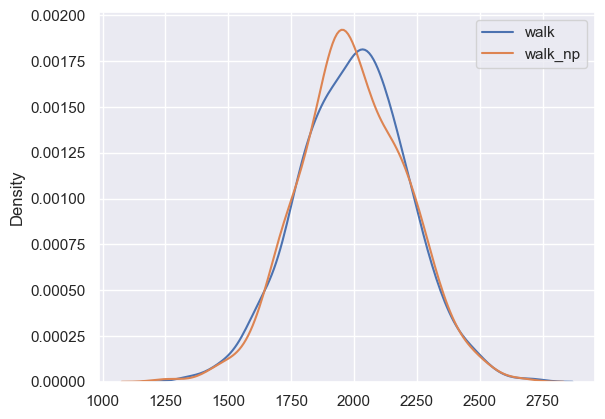

In [26]:
walk_values = [walk(10000) for _ in range(1000)]
walk_np_values = [walk_np(10000) for _ in range(1000)]
sns.kdeplot(walk_values, label='walk')
sns.kdeplot(walk_np_values, label='walk_np')
plt.legend()
plt.show()


In [27]:
%timeit walk(100000)

46 ms ± 624 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit walk_np(100000)

1.56 ms ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [29]:
4.45*1000/168, 44/1.52

(26.488095238095237, 28.94736842105263)

Производительность увеличилась в несколько (~26-29) раз. 

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [30]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.363663053123986

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [31]:
from numba import njit

strange_conv_numba = njit(strange_conv)

a = np.random.random((10000, 10000))
strange_conv_numba(a)

0.5264368548334256

In [32]:
import cython

In [33]:
%load_ext Cython

In [34]:
%%cython

cimport numpy

def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c = 0.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


In [35]:
%timeit strange_conv(a)

12.1 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit strange_conv_numba(a)

29.1 ms ± 624 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit strange_conv_cython(a)

43.1 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Производительность с помощью Numba улучшается в ~438 раз, производительность с Cython больше в 293 раз

In [38]:
print(12.4*1000/28.3,12.4*1000/42.3)

438.1625441696113 293.1442080378251
